# Workload Complexity detection via body signal

Team Member: Ahmed Sameh, Owen Peterson, Ngoc Thien An Le, Nour Hany

*Motivation*:

In the realm of cognitive brain states, Yerkes Dodson law notes that the moderate range of arousal state can result in maximized performance (Yerkes 1907). In this project, the arousal state is achieved with music. Given the specific music type, the group tests whether workload complexity is detectable from body/brain signals, which implies application to smart tutoring and cockpit monitoring.

*Project Focus*:

This project develops a model to classify workload levels (1-th previous memory back and 3-th previous memory back) using multimodal physiological and behavioral data, including ECG, fNIRS, reaction time, and accuracy. The analysis also considers the influence of background music (calming vs. exciting) on task performance and physiological responses. At a given type of background music presented before task execution, the model predicts the level of task complexity based on the physiological and behavioral data.


## Preprocessing

### Understanding the data sets

There are 5 subjects' (experiment participant) data that was recorded in this dataset. The subjects include subject 3, 4, 6, 8, 11.

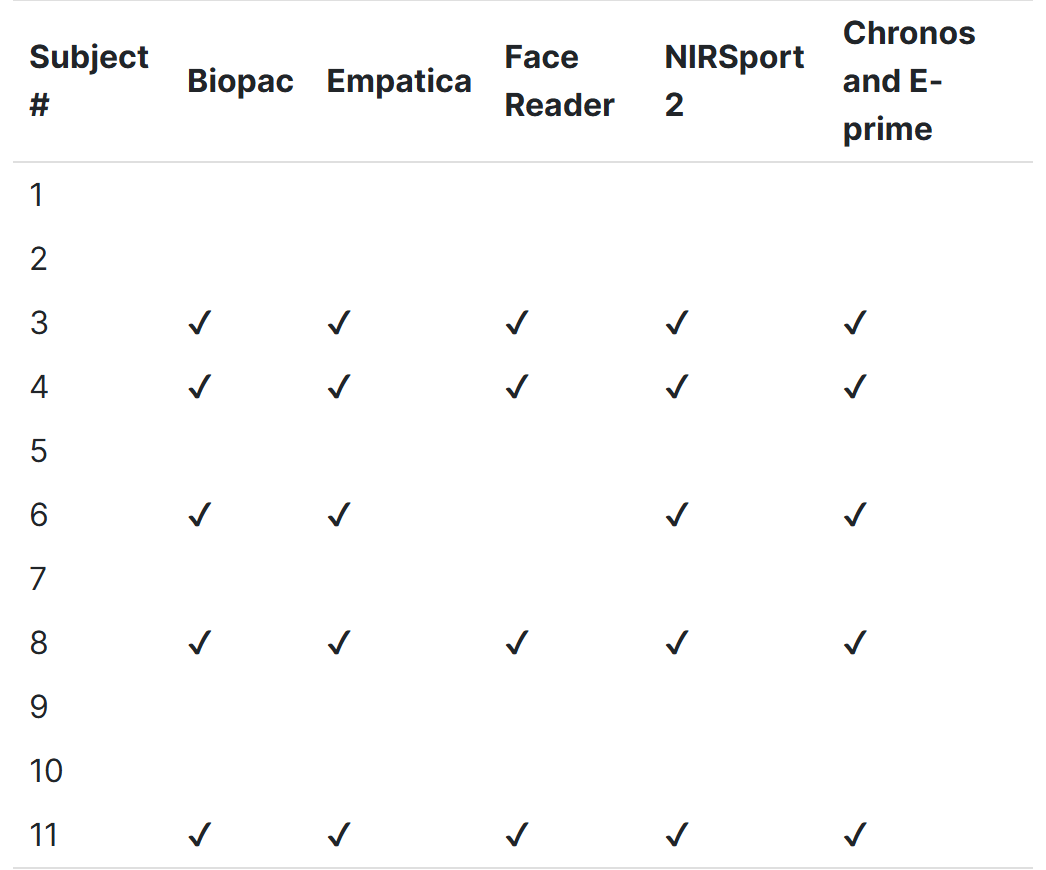


### Physiological data

The file here contain all physiological data collected throughout 2 sessions (First calming and then vexing). Each session has 16 blocks total, each of which has 22 trials. In each block, there are 22 trials of the same n-back task.

The data is being collected regardless of what session/tasks blocks/trials we are in.

To associate physiological data with behavior data, it is noted that:
1. At beginning of each block, there is a 5 seconds delay prior to start time of the first trial.
2. At each trial, a stimulus letter was displayed for 0.5 seconds + 1.5 seconds resting (2 seconds). At the same time, the person is asked if this is the previous 1-back or 3-back letter is the same as the stimulus letter appears. Answer Yes or No --> 49 seconds total per block.
3. There is a 10 seconds delay between each task block
4. After 8 task blocks, there is a 20-second delay
5. After 16 task blocks or each session, there is a 2-minute delay (120 seconds).
6. The duration of each session was 964 s ~ 16 minutes, each session being "Calming" and "Vexing."

1. Collected by BioPac:
* EDA: Electrodermal Activity
* ECG: Electrocardiogram
* Respiration
* PPG: Photoplethysmography
* EMG: Electromyogram
* Timing: Trigger Information with respect to onset of Biopac recording


2. Collected by Empatica
* Tags: Event mark times. Each Row = physical button press on devide (time the status LED is first illuminated). Time is expressed as a de-identified timestamp wrt uniz timestamp in UTC --> synchronized with intial time of the session. Size: ( data point)
* TEMP: Data from temperature sensor expressed in degrees C scale. Size n x 1
  * First row: initial time.
  * Second row: Sample rate (Hz).
  * Third row - n row: Temperature (degC).
  * Processing Plan: Extract row 3 to row n for attribute Temp column. Create a column for associated timestamp based on intial time and sample rate.
* EDA: Electrodermal activity sensor expressed as microS. Size n x 1
  * First row: initial time.
  * Second row: Sample rate (Hz).
  * Third row - n row: EDA (microS).
  * Processing Plan: Extract row 3 to row n for attribute EDA column. Create a column for associated timestamp based on intial time and sample rate.
* BVP: Photoplethysmography. Size n x 1
  * First row: initial time.
  * Second row: Sample rate (Hz).
  * Third row - n row: BVP (unitless).
  * Processing Plan: Extract row 3 to row n for attribute BVP column. Create a column for associated timestamp based on intial time and sample rate.
* ACC: Accelerometer sensor: 3 columns, representing x, y, z axis measurement. Measure acceleration in range [-2g, 2g] --> unit 1/64g. Size n x 3
  * First row: initial time.
  * Second row: Sample rate (Hz).
  * Third row - n row: ACC (1/64g).
  * Processing Plan: Extract row 3 to row n for attribute ACC column. Create a column for associated timestamp based on intial time and sample rate.
* IBI: Time between individual heart beats extracted from the BVP signal. Size n x 2
  * Each row correspnds to one heartbeat
  * First column = time wrt initial time of the detected inter-beat interval (seconds).
  * Second column = duration of the detected inter-beat interval (seconds)
  * Preprocessing Plan: Create a column for initial time of the detected inter-beat interval wrt to UTC by adding the first column with initial time in first row.
* HR: Average heat rated. Size n x 1.
  * First row = initial time of session expressed as unix timestamp in UTC.
  * Second row = sample rate (Hz)
  * Third row - n row: Average HR (Hz)
  * Processing Plan: Extract row 3 to row n for attribute ACC column. Create a column for associated timestamp based on intial time and sample rate.



3. fNIRS: functional near-infrared spectroscopy

In [1]:
import os
from google.colab import drive
import pandas as pd
import glob
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Path for An
opath = '/content/drive/MyDrive/01. Master Degree/03. Data Mining/Group 8 Project/a-multimodal-dataset-for-investigating-working-memory-in-presence-of-music-1.0.0'

In [3]:
# Path for Owen
opath = '/content/drive/MyDrive/umn/24-25/zfall 25/csci 5523/Group 8 Project/a-multimodal-dataset-for-investigating-working-memory-in-presence-of-music-1.0.0'

In [4]:
# Path for Nour
# opath =

In [5]:
# Path for Ahmed
# opath =

In [6]:
behavioral_path = os.path.join(opath, 'Behavioral_data')
biopac_path = os.path.join(opath, 'Biopac_data')
empatica_path = os.path.join(opath, 'Empatica_data')
face_reader_path = os.path.join(opath, 'Face_reader_data')
fnirs_path = os.path.join(opath, 'fNIRS_data')

## 1. Behavioral Data

In [7]:
# Path for Ahmed
path = r'E:\DM_Proj\data\Behavioral_data' # The path where the behavioral CSV files are stored

In [8]:
all_csv_files = glob.glob(os.path.join(behavioral_path, "*.csv"))

df_list = []

for filename in all_csv_files:
    # Struggling
    df = pd.read_csv(filename)
    basename = os.path.basename(filename)
    name_without_ext = os.path.splitext(basename)[0]

    if name_without_ext.startswith('Calming'):
        df['condition'] = 'Calming'
        df['subject_id'] = name_without_ext.replace('Calming', '')
    elif name_without_ext.startswith('Vexing'):
        df['condition'] = 'Vexing'
        df['subject_id'] = name_without_ext.replace('Vexing', '')

    df_list.append(df)

behavior_df = pd.concat(df_list, ignore_index=True)
print(behavior_df.head())

   TrialNumber                                             n_back  \
0            1  One Back Task \n\n Press TARGET if current let...   
1            1  One Back Task \n\n Press TARGET if current let...   
2            1  One Back Task \n\n Press TARGET if current let...   
3            1  One Back Task \n\n Press TARGET if current let...   
4            1  One Back Task \n\n Press TARGET if current let...   

  Stimulus_Letter  Response_Time  Correct_Response  Response condition  \
0               L            0.0               3.0       NaN    Vexing   
1               Q          750.0               3.0       3.0    Vexing   
2               U          431.0               3.0       3.0    Vexing   
3               O          416.0               3.0       3.0    Vexing   
4               U          356.0               3.0       3.0    Vexing   

  subject_id  
0   Subject4  
1   Subject4  
2   Subject4  
3   Subject4  
4   Subject4  


In [9]:
if 'behavior_df' in locals():

    behavior_df['BlockNumber'] = behavior_df['TrialNumber'].ffill()

    behavior_df['TrialInBlock'] = behavior_df.groupby(
        ['subject_id', 'condition', 'BlockNumber']
    ).cumcount() + 1

    print("\nDataFrame with new BlockNumber and TrialInBlock columns")

    print(behavior_df[[
        'subject_id',
        'condition',
        'TrialNumber',
        'BlockNumber',
        'TrialInBlock',
        'Response_Time'
    ]].head(24))

else:
    print("Error: 'behavior_df' not found. Please run the concatenation code first.")


DataFrame with new BlockNumber and TrialInBlock columns
   subject_id condition  TrialNumber  BlockNumber  TrialInBlock  Response_Time
0    Subject4    Vexing            1            1             1            0.0
1    Subject4    Vexing            1            1             2          750.0
2    Subject4    Vexing            1            1             3          431.0
3    Subject4    Vexing            1            1             4          416.0
4    Subject4    Vexing            1            1             5          356.0
5    Subject4    Vexing            1            1             6          447.0
6    Subject4    Vexing            1            1             7          471.0
7    Subject4    Vexing            1            1             8          356.0
8    Subject4    Vexing            1            1             9           69.0
9    Subject4    Vexing            1            1            10          491.0
10   Subject4    Vexing            1            1            11          4

In [10]:
print(behavior_df["n_back"].unique())

['One Back Task \\n\\n Press TARGET if current letter is same as the previous letter\\n\\n'
 'Three Back Task \\n\\n Press TARGET if current letter is same as the third previous letter\\n\\n'
 'Rest']


In [11]:
n_back_mapping = {
    'One Back Task \\n\\n Press TARGET if current letter is same as the previous letter\\n\\n': 'one_back',
    'Three Back Task \\n\\n Press TARGET if current letter is same as the third previous letter\\n\\n': 'three_back',
    'Rest': 'rest'
}

behavior_df['n_back'] = behavior_df['n_back'].map(n_back_mapping)

print("Cleaned 'n_back' column unique values")
print(behavior_df['n_back'].unique())

Cleaned 'n_back' column unique values
['one_back' 'three_back' 'rest']


In [12]:
# Remove 'rest' rows (This effectively removes Block 9)
behavior_df = behavior_df[behavior_df['n_back'] != 'rest'].copy()

# APPLY YOUR FIX: Shift blocks 10+ down by 1
# This turns Block 10 -> 9, Block 11 -> 10, ... Block 17 -> 16
behavior_df.loc[behavior_df['BlockNumber'] > 9, 'BlockNumber'] -= 1

In [13]:
print(behavior_df.isnull().sum())

TrialNumber           0
n_back                0
Stimulus_Letter       0
Response_Time         0
Correct_Response      0
Response            502
condition             0
subject_id            0
BlockNumber           0
TrialInBlock          0
dtype: int64


In [14]:
import numpy as np
import pandas as pd

behavior_df['Correct_Response'] = pd.to_numeric(
    behavior_df['Correct_Response'],
    errors='coerce'
)

behavior_df['Subject_Response_Cleaned'] = pd.to_numeric(
    behavior_df['Response'],
    errors='coerce'
)

behavior_df['Response_Time'] = pd.to_numeric(
    behavior_df['Response_Time'],
    errors='coerce'
).fillna(0)


cond_unknown_target = behavior_df['Correct_Response'].isna()

cond_correct_hit = (behavior_df['Response_Time'] > 0) & \
                   (behavior_df['Correct_Response'] != 0) & \
                   (behavior_df['Subject_Response_Cleaned'] == behavior_df['Correct_Response'])

cond_correct_rejection = (behavior_df['Response_Time'] == 0) & \
                         (behavior_df['Correct_Response'] == 0)

cond_false_alarm = (behavior_df['Response_Time'] > 0) & \
                   (behavior_df['Correct_Response'] == 0)

cond_wrong_key = (behavior_df['Response_Time'] > 0) & \
                 (behavior_df['Correct_Response'] != 0) & \
                 (behavior_df['Subject_Response_Cleaned'] != behavior_df['Correct_Response'])

cond_miss_no_response = (behavior_df['Response_Time'] == 0) & \
                        (behavior_df['Correct_Response'] != 0)

conditions = [
    cond_unknown_target,
    cond_correct_hit | cond_correct_rejection,
    cond_false_alarm | cond_wrong_key,
    cond_miss_no_response
]
values = [0, 1, -1, 0]

behavior_df['Correct'] = np.select(conditions, values, default=0)

columns_to_drop = [
    'TrialNumber', 'Stimulus_Letter', 'Correct_Response',
    'Response', 'Subject_Response_Cleaned'
]
behavior_df = behavior_df.drop(columns=columns_to_drop)

print("\n'Correct' column value counts")
print(behavior_df['Correct'].value_counts(dropna=False))


'Correct' column value counts
Correct
 1    2554
 0     502
-1     464
Name: count, dtype: int64


In [15]:
print(behavior_df.isnull().sum())

n_back           0
Response_Time    0
condition        0
subject_id       0
BlockNumber      0
TrialInBlock     0
Correct          0
dtype: int64


In [16]:
behavior_df_vexing = behavior_df[behavior_df['condition'] == 'Vexing'].copy()
behavior_df_calming = behavior_df[behavior_df['condition'] == 'Calming'].copy()

In [17]:
print(behavior_df.head())
print(behavior_df_calming.head())
print(behavior_df_vexing.head())

     n_back  Response_Time condition subject_id  BlockNumber  TrialInBlock  \
0  one_back            0.0    Vexing   Subject4            1             1   
1  one_back          750.0    Vexing   Subject4            1             2   
2  one_back          431.0    Vexing   Subject4            1             3   
3  one_back          416.0    Vexing   Subject4            1             4   
4  one_back          356.0    Vexing   Subject4            1             5   

   Correct  
0        0  
1        1  
2        1  
3        1  
4        1  
       n_back  Response_Time condition subject_id  BlockNumber  TrialInBlock  \
353  one_back            0.0   Calming   Subject4            1             1   
354  one_back          838.0   Calming   Subject4            1             2   
355  one_back          374.0   Calming   Subject4            1             3   
356  one_back          405.0   Calming   Subject4            1             4   
357  one_back           39.0   Calming   Subject4    

In [18]:
print(behavior_df.columns)
print(behavior_df_calming.columns)
print(behavior_df_vexing.columns)

Index(['n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber',
       'TrialInBlock', 'Correct'],
      dtype='object')
Index(['n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber',
       'TrialInBlock', 'Correct'],
      dtype='object')
Index(['n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber',
       'TrialInBlock', 'Correct'],
      dtype='object')


### Preparation for Merging - Behavior

In [19]:
# Convert 'n_back' column to numeric type (1 for 'one_back', 3 for 'three_back')
behavior_df['n_back'] = behavior_df['n_back'].map({'one_back': 1, 'three_back': 3})
behavior_df_calming['n_back'] = behavior_df_calming['n_back'].map({'one_back': 1, 'three_back': 3})
behavior_df_vexing['n_back'] = behavior_df_vexing['n_back'].map({'one_back': 1, 'three_back': 3})

In [20]:
print(behavior_df.head())
print(behavior_df_calming.head())
print(behavior_df_vexing.head())

   n_back  Response_Time condition subject_id  BlockNumber  TrialInBlock  \
0       1            0.0    Vexing   Subject4            1             1   
1       1          750.0    Vexing   Subject4            1             2   
2       1          431.0    Vexing   Subject4            1             3   
3       1          416.0    Vexing   Subject4            1             4   
4       1          356.0    Vexing   Subject4            1             5   

   Correct  
0        0  
1        1  
2        1  
3        1  
4        1  
     n_back  Response_Time condition subject_id  BlockNumber  TrialInBlock  \
353       1            0.0   Calming   Subject4            1             1   
354       1          838.0   Calming   Subject4            1             2   
355       1          374.0   Calming   Subject4            1             3   
356       1          405.0   Calming   Subject4            1             4   
357       1           39.0   Calming   Subject4            1             5 

In [21]:
behavior_df_calming.to_csv("behavior_df_calming.csv")
behavior_df_vexing.to_csv("behavior_df_vexing.csv")
behavior_df.to_csv("behavior_df.csv")

## 2. Biopac Data

In [22]:
eda_path = os.path.join(biopac_path, 'EDA')
eda_files = glob.glob(os.path.join(eda_path, '*.csv'))

ecg_path = os.path.join(biopac_path, 'ECG')
ecg_files = glob.glob(os.path.join(ecg_path, '*.csv'))

emg_path = os.path.join(biopac_path, 'EMG')
emg_files = glob.glob(os.path.join(emg_path, '*.csv'))

resp_path = os.path.join(biopac_path, 'RESP')
resp_files = glob.glob(os.path.join(resp_path, '*.csv'))

ppg_path = os.path.join(biopac_path, 'PPG')
ppg_files = glob.glob(os.path.join(ppg_path, '*.csv'))

skt_path = os.path.join(biopac_path, 'SKT')
skt_files = glob.glob(os.path.join(skt_path, '*.csv'))

timing_path = os.path.join(biopac_path, 'Timing')
timing_files = glob.glob(os.path.join(timing_path, '*.csv'))

In [23]:
# sampling rate
fs = 2000
dt = 1 / fs

timing_df = pd.read_csv(os.path.join(timing_path, 'Subject3F_Triggers_block.csv'))
eda_df = pd.read_csv(os.path.join(eda_path, 'Subject3F_EDA.csv'))
print(timing_df.head(10))

   calming_1_back_start  calming_3_back_start  calming_1_back_end  \
0              502.3595              562.4860            545.9210   
1              684.0530              623.3450            727.8635   
2              804.5550              744.4120            848.1155   
3              864.6955              925.5710            909.0065   
4             1061.8210             1001.4610           1105.3820   
5             1121.9800             1182.7705           1166.2395   
6             1303.9050             1243.3960           1347.4340   
7             1425.1405             1363.9810           1469.1000   

   calming_3_back_end  vexing_1_back_start  vexing_3_back_start  \
0            606.7625            1612.8830            1673.6235   
1            667.4880            1734.0670            1794.5925   
2            788.0060            1854.7680            1914.9930   
3            969.8165            1975.8025            2036.6275   
4           1045.2720            2111.9830 

In [24]:
def load_subject_trials(subject_id, signal_type, biopac_path=biopac_path):
    # File paths
    signal_file = os.path.join(f"{biopac_path}/", f"{signal_type}/", f'Subject{subject_id}_{signal_type}.csv')
    timing_block_file = os.path.join(biopac_path, 'Timing/', f'Subject{subject_id}_Triggers_block.csv')
    timing_trial_file = os.path.join(biopac_path, 'Timing/', f'Subject{subject_id}_Triggers_trial.csv')

    # Get time_s from index (2khz per obs)
    signal_df = pd.read_csv(signal_file, header=None, names=[signal_type])
    signal_df["time_s"] = signal_df.index / fs

    block_df = pd.read_csv(timing_block_file)
    trial_df = pd.read_csv(timing_trial_file)

    # Parse Blocks
    blocks = []
    for col in block_df.columns:
        if col.endswith("_start"):
            base = col.replace("_start", "")
            condition, task = base.split("_", 1)
            for start, end in zip(block_df[col], block_df[f"{base}_end"]):
                blocks.append({
                    "condition": condition,
                    "task": task,
                    "start_time": float(start),
                    "end_time": float(end),
                })
    blocks_df = pd.DataFrame(blocks).sort_values("start_time").reset_index(drop=True)
    blocks_df["block"] = blocks_df.index + 1  # Number blocks sequentially

    # Parse Trials
    trials = []
    for col in trial_df.columns:
        if col.endswith("_start"):
            base = col.replace("_start", "")
            condition, task = base.split("_", 1)

            # Get corresponding end column
            start_times = trial_df[col].dropna().values
            end_times = trial_df[f"{base}_end"].dropna().values

            # Validation: start and end must match in length
            if len(start_times) != len(end_times):
                raise ValueError(f"Mismatch: {base} has {len(start_times)} starts but {len(end_times)} ends")

            # Validation: each trial type must have 32 * 22 = 704 total trials
            # Or 22 per block (if block structure is consistent across rows)
            if len(start_times) != 22 * 32 / 4:
                print(f"Warning: {base} has {len(start_times)} trials (expected 704)")

            for start, end in zip(start_times, end_times):
                trials.append({
                    "condition": condition,
                    "task": task,
                    "start_time": float(start),
                    "end_time": float(end),
                })

    trials_df = pd.DataFrame(trials).sort_values("start_time").reset_index(drop=True)

    # Assign Block IDs to Trials
    trials_df["block"] = 0
    for _, b in blocks_df.iterrows():
        mask = (
            (trials_df["condition"] == b["condition"]) &
            (trials_df["task"] == b["task"]) &
            (trials_df["start_time"] >= b["start_time"]) &
            (trials_df["end_time"] <= b["end_time"])
        )
        trials_df.loc[mask, "block"] = b["block"]

    # Assign Trial Index Per Block
    trials_df["trial"] = 0
    for block, subdf in trials_df.groupby("block"):
        if block > 0:
            trials_df.loc[subdf.index, "trial"] = range(1, len(subdf) + 1)

    # Label Signal Data
    signal_df["condition"] = "break"
    signal_df["task"] = "break"
    signal_df["block"] = 0
    signal_df["trial"] = 0  # temporary placeholder for blocks, will overwrite in trials

    # Assign block-level metadata
    for _, b in blocks_df.iterrows():
        block_mask = (
            (signal_df["time_s"] >= b["start_time"]) &
            (signal_df["time_s"] <= b["end_time"])
        )
        signal_df.loc[block_mask, "block"] = b["block"]
        signal_df.loc[block_mask, "condition"] = b["condition"]
        signal_df.loc[block_mask, "task"] = b["task"]

    # Assign trial-level metadata (overwrite within blocks)
    for block, block_trials in trials_df.groupby("block"):
      block_trials = block_trials.sort_values("start_time").reset_index(drop=True)

      # Loop through trials within this block
      for i in range(len(block_trials)):
          t = block_trials.iloc[i]
          start_time = t["start_time"]

          # If not last trial, end at next trial's start
          if i < len(block_trials) - 1:
              end_time = block_trials.iloc[i + 1]["start_time"]
          else:
              # Last trial in block: use block end time
              end_time = blocks_df[blocks_df["block"] == block]["end_time"].values[0]

          trial_mask = (
              (signal_df["time_s"] >= start_time) &
              (signal_df["time_s"] <= end_time + 0.5)
          )
          signal_df.loc[trial_mask, "trial"] = t["trial"]

    # Assign 'instruction' to the period before first trial
    first_trial_start = trials_df["start_time"].min()
    instruction_mask = signal_df["time_s"] < first_trial_start
    signal_df.loc[instruction_mask, ["condition", "task", "block", "trial"]] = [
        "instruction", "instruction", 0, 0
    ]

    # Convert trial=0 inside blocks to an appropriate label, e.g. 'iti'
    signal_df["trial"] = signal_df["trial"].replace(0, "iti")
    # iti = inter-trial period

    # Build Summary Timing Table
    summary_timing = trials_df.assign(duration=lambda x: x["end_time"] - x["start_time"])

    return signal_df, summary_timing

In [25]:
# Collect subject IDs
ids = []
for filename in os.listdir(os.path.join(biopac_path, 'EDA')):
  subject = filename.split('_')[0]
  id = subject.split("Subject")[1]
  if id not in ids:
    ids.append(id)
print("Found subject IDs: ", ids)

# Create nested dictionary to store all data
data = {
    "EDA": {},
    "ECG": {},
    "EMG": {},
    "RESP": {},
    "PPG": {},
    "SKT": {}
}

# Load each subject's data for each signal type
for subject in ids:
  for signal in data.keys():
    sig_df, time_df = load_subject_trials(subject, signal, biopac_path)
    data[signal][subject] = {
        "segmented": sig_df,
        "timing": time_df
    }
    print(f"Loaded {signal} data for subject {subject}")

Found subject IDs:  ['3F', '11F', '8M', '6M', '4F']
Loaded EDA data for subject 3F
Loaded ECG data for subject 3F
Loaded EMG data for subject 3F
Loaded RESP data for subject 3F
Loaded PPG data for subject 3F
Loaded SKT data for subject 3F
Loaded EDA data for subject 11F
Loaded ECG data for subject 11F
Loaded EMG data for subject 11F
Loaded RESP data for subject 11F
Loaded PPG data for subject 11F
Loaded SKT data for subject 11F
Loaded EDA data for subject 8M
Loaded ECG data for subject 8M
Loaded EMG data for subject 8M
Loaded RESP data for subject 8M
Loaded PPG data for subject 8M
Loaded SKT data for subject 8M
Loaded EDA data for subject 6M
Loaded ECG data for subject 6M
Loaded EMG data for subject 6M
Loaded RESP data for subject 6M
Loaded PPG data for subject 6M
Loaded SKT data for subject 6M
Loaded EDA data for subject 4F
Loaded ECG data for subject 4F
Loaded EMG data for subject 4F
Loaded RESP data for subject 4F
Loaded PPG data for subject 4F
Loaded SKT data for subject 4F


In [26]:
def summarize_signal(data, signal):
    """Return a statistical summary for a given signal type across all subjects."""
    dfs = []

    for subject, dicts in data[signal].items():
        df = dicts["segmented"]

        # Optional: drop non-numeric columns like 'trial'
        numeric_df = df.select_dtypes(include='number')

        dfs.append(numeric_df)

    combined = pd.concat(dfs, ignore_index=True)
    return combined.describe()

In [27]:
for sig in data.keys():
    print(f"\nSignal Type: {sig}")
    print(summarize_signal(data, sig))


Signal Type: EDA
                EDA        time_s         block
count  2.836953e+07  2.836953e+07  2.836953e+07
mean   4.561144e+00  1.433998e+03  8.090724e+00
std    2.506351e+00  8.474910e+02  1.047831e+01
min   -4.274700e+01  0.000000e+00  0.000000e+00
25%    2.259800e+00  7.092380e+02  0.000000e+00
50%    5.592300e+00  1.418476e+03  0.000000e+00
75%    6.341600e+00  2.127714e+03  1.600000e+01
max    1.192800e+01  3.407534e+03  3.200000e+01

Signal Type: ECG
                ECG        time_s         block
count  2.836953e+07  2.836953e+07  2.836953e+07
mean   9.023619e-03  1.433998e+03  8.090724e+00
std    2.003412e-01  8.474910e+02  1.047831e+01
min   -1.491700e+00  0.000000e+00  0.000000e+00
25%   -6.424000e-02  7.092380e+02  0.000000e+00
50%   -2.746600e-03  1.418476e+03  0.000000e+00
75%    4.699700e-02  2.127714e+03  1.600000e+01
max    4.999800e+00  3.407534e+03  3.200000e+01

Signal Type: EMG
                EMG        time_s         block
count  2.836953e+07  2.836953e+07 

In [28]:
def combine_signals_to_dataframe(data_dict, subject_id):
    """
    Combine all signal types for a subject into a single dataframe
    Includes break periods labeled as "break" under Trial column

    data_dict: nested dict like {'EDA': {'11F': {'segmented': df}}, 'ECG': {...}, ...}
    subject_id: str like '11F'

    Returns: DataFrame with columns [Time (s), Block, Trial, Condition, Task, EDA, ECG, EMG, RESP, PPG, SKT]
    """
    signal_types = data_dict.keys()
    dfs = []

    for sig_type in signal_types:
        if subject_id in data_dict[sig_type]:
            df = data_dict[sig_type][subject_id]['segmented'].copy()
            df = df.rename(columns={sig_type: sig_type})  # ensure correct column name
            dfs.append(df)
        else:
            print(f"Warning: {sig_type} not found for subject {subject_id}")

    if not dfs:
        raise ValueError(f"No signals found for subject {subject_id}")

    # Merge all signals on shared metadata columns
    from functools import reduce
    combined_df = reduce(
        lambda left, right: pd.merge(
            left, right,
            on=['time_s', 'condition', 'task', 'block', 'trial'],
            how='outer'
        ),
        dfs
    )

    combined_df = combined_df.sort_values('time_s').reset_index(drop=True)

    # Standardize column order: metadata first, then signals
    metadata_cols = ['time_s', 'condition', 'task', 'block', 'trial']
    signal_cols = [col for col in combined_df.columns if col not in metadata_cols]
    combined_df = combined_df[metadata_cols + signal_cols]

    return combined_df

In [29]:
subj = {'11F', '3F', '4F', '6M', '8M'}
subj_dfs = {}
for di in subj:
    subj_df = combine_signals_to_dataframe(data, di)
    subj_dfs[di] = subj_df

    print(f"\nSubject {di}")
    print(subj_df)
    print(f"\nShape: {subj_df.shape}")
    print(f"\nColumns: {subj_df.columns.tolist()}")


Subject 3F
            time_s    condition         task  block trial     EDA       ECG  \
0           0.0000  instruction  instruction      0   iti  6.6223  0.011444   
1           0.0005  instruction  instruction      0   iti  6.6238  0.011597   
2           0.0010  instruction  instruction      0   iti  6.6223  0.011749   
3           0.0015  instruction  instruction      0   iti  6.6238  0.011749   
4           0.0020  instruction  instruction      0   iti  6.6254  0.011749   
...            ...          ...          ...    ...   ...     ...       ...   
5214959  2607.4795        break        break      0   iti  6.9916 -0.011139   
5214960  2607.4800        break        break      0   iti  6.9916 -0.007477   
5214961  2607.4805        break        break      0   iti  6.9916 -0.004120   
5214962  2607.4810        break        break      0   iti  6.9916 -0.001526   
5214963  2607.4815        break        break      0   iti  6.9916  0.001068   

              EMG    RESP       PPG    

In [30]:
def trial_mean_std(subj_df):
    """
    Compute trial-wise mean and standard deviation for each biosignal in the subject's dataframe.
    Returns a trial-level summary DataFrame ready for ML/statistics.

    subj_df: merged signal-level DataFrame for a subject (i.e., subj_dfs['3F'])
    """
    # Step 1: Filter out ITI and instruction rows
    trial_df = subj_df[(subj_df['trial'] != 'iti')& (subj_df['block'] != 0) & (subj_df['trial'] != 0)]

    # Step 2: List biosignal columns
    signal_cols = ['EDA', 'ECG', 'EMG', 'RESP', 'PPG', 'SKT']

    # Step 3: Group by block and trial, calculate mean and std per signal
    # Include 'condition' and 'task' in groupby to preserve them
    trial_features = trial_df.groupby(['condition', 'task', 'block', 'trial'])[signal_cols].agg(['mean', 'std'])

    # Step 4: Flatten MultiIndex columns
    trial_features.columns = ['_'.join(col).strip() for col in trial_features.columns.values]
    trial_features = trial_features.reset_index()

    return trial_features

In [31]:
for di in subj:
    subj_df = trial_mean_std(subj_dfs[di])
    filename = f'subject_{di}_biopac.csv'
    subj_df.to_csv(filename, index=False)
    print(f"Saved {filename}")

Saved subject_3F_biopac.csv
Saved subject_11F_biopac.csv
Saved subject_8M_biopac.csv
Saved subject_6M_biopac.csv
Saved subject_4F_biopac.csv


### Preparation for Merging - Biopac

In [32]:
import pandas as pd

biopac_list = []

subject_ids = ['3F', '4F', '6M', '8M', '11F']

for sub_id in subject_ids:
    file_path = f"subject_{sub_id}_biopac.csv"

    try:
        df = pd.read_csv(file_path)
    except FileNotFoundError:
        print(f"Warning: File not found: {file_path}")
        continue

    df = df.copy().reset_index(drop=True)

    # Convert '3F' -> 'Subject3'
    numeric_id = sub_id[:-1]
    df['subject_id'] = f"Subject{numeric_id}"

    biopac_list.append(df)

if biopac_list:
    biopac_df = pd.concat(biopac_list, ignore_index=True)
    print(f"Successfully concatenated {len(biopac_list)} Biopac DataFrames.")
    print(f"Shape of merged Biopac data: {biopac_df.shape}")
    display(biopac_df.head())
    display(biopac_df.tail())
else:
    print("No Biopac DataFrames found for concatenation.")

Successfully concatenated 5 Biopac DataFrames.
Shape of merged Biopac data: (3520, 17)


,condition,task,block,trial,EDA_mean,EDA_std,ECG_mean,ECG_std,EMG_mean,EMG_std,RESP_mean,RESP_std,PPG_mean,PPG_std,SKT_mean,SKT_std,subject_id
0,calming,1_back,1,1,7.287413,0.027100,0.001635,0.177866,-0.002649,0.023537,-1.512415,0.405026,0.048881,0.013827,22.811811,0.000667,Subject3
1,calming,1_back,1,2,7.423203,0.132056,0.008874,0.185530,-0.002281,0.024906,-1.408427,0.706516,0.040332,0.016314,22.811768,0.000654,Subject3
2,calming,1_back,1,3,7.778506,0.066124,0.000028,0.171536,-0.002432,0.021953,-1.452782,0.134476,0.053500,0.009345,22.809185,0.004392,Subject3
3,calming,1_back,1,4,7.970684,0.024634,0.019290,0.195372,-0.001152,0.026753,-1.196542,0.254039,0.048670,0.011460,22.801938,0.000883,Subject3
4,calming,1_back,1,5,8.054665,0.023269,0.005785,0.186197,-0.002420,0.025557,-0.918923,0.503383,0.046912,0.008524,22.800914,0.003026,Subject3


,condition,task,block,trial,EDA_mean,EDA_std,ECG_mean,ECG_std,EMG_mean,EMG_std,RESP_mean,RESP_std,PPG_mean,PPG_std,SKT_mean,SKT_std,subject_id
3515,vexing,3_back,31,18,6.163012,0.010678,0.011317,0.239701,-0.002198,0.043790,-1.703619,0.224279,0.048674,0.060681,28.261000,0.004949,Subject11
3516,vexing,3_back,31,19,6.117180,0.015006,0.008393,0.249012,-0.002102,0.041935,-1.447510,0.241983,0.048625,0.041086,28.246235,0.005835,Subject11
3517,vexing,3_back,31,20,6.082865,0.005195,0.010210,0.245902,-0.002554,0.041538,-1.344885,0.060879,0.061392,0.065997,28.230683,0.004845,Subject11
3518,vexing,3_back,31,21,6.065195,0.006304,0.010339,0.244162,-0.001744,0.043292,-1.458071,0.155159,0.032328,0.058451,28.214876,0.005797,Subject11
3519,vexing,3_back,31,22,6.049484,0.002507,0.005796,0.359391,-0.003093,0.056383,-1.116110,0.027311,0.026531,0.037201,28.206690,0.000769,Subject11


In [33]:
print(biopac_df.isnull().sum())
print(biopac_df.head())
print(biopac_df.tail())

condition     0
task          0
block         0
trial         0
EDA_mean      0
EDA_std       0
ECG_mean      0
ECG_std       0
EMG_mean      0
EMG_std       0
RESP_mean     0
RESP_std      0
PPG_mean      0
PPG_std       0
SKT_mean      0
SKT_std       0
subject_id    0
dtype: int64
  condition    task  block  trial  EDA_mean   EDA_std  ECG_mean   ECG_std  \
0   calming  1_back      1      1  7.287413  0.027100  0.001635  0.177866   
1   calming  1_back      1      2  7.423203  0.132056  0.008874  0.185530   
2   calming  1_back      1      3  7.778506  0.066124  0.000028  0.171536   
3   calming  1_back      1      4  7.970684  0.024634  0.019290  0.195372   
4   calming  1_back      1      5  8.054665  0.023269  0.005785  0.186197   

   EMG_mean   EMG_std  RESP_mean  RESP_std  PPG_mean   PPG_std   SKT_mean  \
0 -0.002649  0.023537  -1.512415  0.405026  0.048881  0.013827  22.811811   
1 -0.002281  0.024906  -1.408427  0.706516  0.040332  0.016314  22.811768   
2 -0.002432  0.021953

In [34]:
# Copy biopac to merge
biopac_to_merge = biopac_df.copy()

# Rename 'trial' to 'TrialInBlock' and 'block' to 'BlockNumber'
biopac_to_merge = biopac_to_merge.rename(columns = {"trial": "TrialInBlock", "block": "BlockNumber"})
biopac_to_merge["BlockNumber"] = pd.to_numeric(biopac_to_merge["BlockNumber"], errors='coerce')
biopac_to_merge["TrialInBlock"] = pd.to_numeric(biopac_to_merge["TrialInBlock"], errors= 'coerce')

# Fixing mismatch in subject ID of subject 8
biopac_to_merge['subject_id'] = biopac_to_merge['subject_id'].replace('Subject_8', 'Subject8')

# Renaming EDA column to distinguish between biopac and empatica
biopac_to_merge = biopac_to_merge.rename(columns={
    'EDA_mean': 'EDA_mean_biopac',
    'EDA_std': 'EDA_std_biopac'
})

# Separate the calming and vexing session
biopac_to_merge_per_music = biopac_to_merge.copy()
biopac_to_merge_calming = biopac_to_merge_per_music[biopac_to_merge_per_music['condition'] == 'calming']
biopac_to_merge_vexing = biopac_to_merge_per_music[biopac_to_merge_per_music['condition'] == 'vexing']

biopac_to_merge_vexing = biopac_to_merge_per_music[
    biopac_to_merge_per_music['condition'] == 'vexing'
].copy()

biopac_to_merge_calming = biopac_to_merge_per_music[
    biopac_to_merge_per_music['condition'] == 'calming'
].copy()

biopac_to_merge_vexing["BlockNumber"] = biopac_to_merge_vexing["BlockNumber"] - 16

# Drop column condition
biopac_to_merge_calming = biopac_to_merge_calming.drop(columns=['condition'])
biopac_to_merge_vexing = biopac_to_merge_vexing.drop(columns=['condition'])

print("Unique subjects in biopac_to_merge_calming after correction:", biopac_to_merge_calming['subject_id'].unique())
print("Unique subjects in biopac_to_merge_vexing after correction:", biopac_to_merge_vexing['subject_id'].unique())

Unique subjects in biopac_to_merge_calming after correction: ['Subject3' 'Subject4' 'Subject6' 'Subject8' 'Subject11']
Unique subjects in biopac_to_merge_vexing after correction: ['Subject3' 'Subject4' 'Subject6' 'Subject8' 'Subject11']


In [35]:
print(biopac_to_merge_calming.head())
print(biopac_to_merge_vexing.head())

print(biopac_to_merge_calming.shape)
print(biopac_to_merge_vexing.shape)

     task  BlockNumber  TrialInBlock  EDA_mean_biopac  EDA_std_biopac  \
0  1_back            1             1         7.287413        0.027100   
1  1_back            1             2         7.423203        0.132056   
2  1_back            1             3         7.778506        0.066124   
3  1_back            1             4         7.970684        0.024634   
4  1_back            1             5         8.054665        0.023269   

   ECG_mean   ECG_std  EMG_mean   EMG_std  RESP_mean  RESP_std  PPG_mean  \
0  0.001635  0.177866 -0.002649  0.023537  -1.512415  0.405026  0.048881   
1  0.008874  0.185530 -0.002281  0.024906  -1.408427  0.706516  0.040332   
2  0.000028  0.171536 -0.002432  0.021953  -1.452782  0.134476  0.053500   
3  0.019290  0.195372 -0.001152  0.026753  -1.196542  0.254039  0.048670   
4  0.005785  0.186197 -0.002420  0.025557  -0.918923  0.503383  0.046912   

    PPG_std   SKT_mean   SKT_std subject_id  
0  0.013827  22.811811  0.000667   Subject3  
1  0.016314 

## 3. Empatica Data

The following preprocessing functions are being defined:
1. ibi_df_processing: to convert the ibi value into bpm
2. file_empatica_to_pd: to create new dataframe with time column on the left of the measurement columnns
3. aggregate: to aggregate the time dataframe to have mean measurement every 5 seconds
4. file_extraction_empatica: to extract all files for a particular subject in empatica folder from the drive

In [36]:
import numpy as np
def acc_df_preprocessing(acc_df):
  col_header = acc_df.columns.to_list()
  acc_df["ACC_mag"] = np.sqrt(acc_df[col_header[0]]**2 + acc_df[col_header[0]]**2 + acc_df[col_header[0]]**2)

  return acc_df["ACC_mag"] # Return only the ACC_mag column

In [37]:
def empatica_file_to_pd(file_name, df):
  '''
  This function is used to create new dataframe for empatica data with time column on the left of the measurement columnns.
  Args:
  file_name: file_name .csv
  df: dataframe we are passing through

  Returns:
  merged_df: dataframe with time
  '''

  # Header is the initial time where the device started
  initial_start_time = df.columns.to_list()

  if "IBI" not in file_name:
    # Extract rate of record time
    sample_rate = df.iloc[0,0] # Hz
    sample_rate_s = 1/ sample_rate # seconds

    # Create time column
    ## Every 1 minute = 60 seconds add 60 into unix time
    for col in range(len(initial_start_time)):
      all_time_col = {} # Store all data in a dictionary and we can break it out later
      initial_time = float(initial_start_time[col]) # Unix time

      current_time = initial_time # Unix time
      time_col = [current_time]

      for msm in range(1, df.shape[0]-1): # Iterate each row - measurement
        new_time = current_time + sample_rate_s
        time_col.append(new_time) # key is the start time
        current_time += sample_rate_s

      # Add in the dictionary all the returned values
      all_time_col[initial_start_time[col]] = time_col

  elif "IBI" in file_name:
    all_time_col = {} # Store all data in a dictionary and we can break it out later
    initial_time = float(initial_start_time[0]) # Unix time

    time_col = [initial_time]
    for msm in range(1, df.shape[0]):
      # print(df.iloc[0,msm])
      new_time = initial_time + df.iloc[msm,0]
      time_col.append(new_time) # key is the start time

    # Add in the dictionary all the returned values
    all_time_col[initial_start_time[0]] = time_col

    sample_rate_s = 0 # random for ibi

  # Convert time df into dataframe
  time_df = pd.DataFrame.from_dict(all_time_col)

  # Combine data frame using column
  # Dropping first item in temp data as it represents the rate
  if "IBI" not in file_name:
    df.drop(0, inplace = True)
    df.reset_index(drop = True, inplace = True)

  if "ACC" in file_name:
    df = acc_df_preprocessing(df)
  merged_df = pd.concat([time_df, df], axis = 1)

  return merged_df, initial_start_time, sample_rate_s

In [38]:
import pandas as pd
from scipy.signal import butter, filtfilt
import numpy as np

def butter_lowpass_filter(data, cutoff, fs, order=2):
    b, a = butter(order, cutoff / (fs / 2), btype='low')
    # Use the 'gust' method for filtfilt which is better for short data segments
    # and does not require padding.
    return filtfilt(b, a, data, method='gust')


def aggregate(df, file_name, sample_rate_s):
  '''
  Function: Aggregate dataframe from whatever the original sample rate is every 5 seconds.
  Args:
  df: Dataframe with time provided

  Return:
  df_resampled: Dataframe with average value after every 5 seconds
  '''

  # Convert the time column to datetime and set it as the index
  # Assuming the first column is the time column
  df.index = pd.to_datetime(df.iloc[:, 0], unit='s')

  # Perform filtering before resmapled
  # BVP (64 Hz)
  if "BVP" in file_name:
    df["BVP"] = butter_lowpass_filter(df.iloc[:, 1], cutoff=4, fs=1/sample_rate_s)
    df_resampled = df["BVP"].resample("1s").mean()

  # EDA (4 Hz)
  elif "EDA" in file_name:
    df["EDA"] = butter_lowpass_filter(df.iloc[:, 1], cutoff=0.5, fs= 1/sample_rate_s)
    df_resampled = df["EDA"].resample("1s").mean()

  # ACC (32 Hz)
  elif "ACC" in file_name:
    df["ACC"] = butter_lowpass_filter(df.iloc[:, 1], cutoff=5, fs=1/sample_rate_s)
    df_resampled = df["ACC"].resample("1s").mean()

  elif "IBI" in file_name:
    # For IBI, we don't filter, just resample and forward fill NaNs
    df_resampled = df.resample("1s").mean().ffill()

  else: # HR
    df_resampled = df.resample('1s').mean()

  # df_resampled.reset_index()

  # For IBI, the measurements are not being recorded at a constant sample rate
  # There are multiple Nan values resulted by using resampled method
  # We will be filling these Nan value to be the value previous value


  return df_resampled

In [39]:
def empatica_file_extraction(org_path, subject_num):
  '''
  This function is used to output all the measurement data for a particular subject.
  This function has not process the tag data yet.
  Args:
  org_path: Takes the original path from above [str]
  subject_num: subject number [int]
  Returns:
  files_list: List of all files in folder
  time_d: dictionary containing all measurement data prior to being aggregated. Key of dictionary is the csv file name and value is the dataframe.
  aggregated_d: dictionary containing all measurement data after being aggregated. Key of dictionary is the csv file name and value is the dataframe.
  '''

  if subject_num == 3 or subject_num == 4 or subject_num == 11:
    gender = "F"
  else:
    gender = "M"

  # Create subject folder name
  subject_folder_name = "Subject_" + str(subject_num) + gender

  # Add the specified subject folder into path
  subject_folder_path = os.path.join(org_path, subject_folder_name)

  # Open the folder
  files_list = os.listdir(subject_folder_path)

  # Create dictionary to store all dataframe
  time_d = {}
  aggregated_d = {}

  # For loop to retrieve each file
  for i in files_list: # For each subject, loop through all csv
    # print(i)
    if "tags" not in i: # Exclude files with "tags" in the name
      file_path = os.path.join(subject_folder_path, i) # Construct the full file path
      file_read = open(file_path, 'r') # open each csv
      original_df = pd.read_csv(file_path)

      time_df, initial_start_time, sample_rate_s = empatica_file_to_pd(i, original_df) # Passing name and file from list, and df
      time_d[i] = time_df

      aggregated_df = aggregate(time_df, i, sample_rate_s)
      aggregated_d[i] = aggregated_df

    if "tags" in i:
      file_path = os.path.join(subject_folder_path, i) # Construct the full file path
      file_read = open(file_path, 'r') # open each csv
      tags_pd = pd.read_csv(file_path)


  return files_list, time_d, aggregated_d, tags_pd

In [40]:
file_list_sub3, time_dictionary_sub3, aggregated_dictionary_sub3, tags_pd_sub3 = empatica_file_extraction(empatica_path, 3)
file_list_sub4, time_dictionary_sub4, aggregated_dictionary_sub4, tags_pd_sub4 = empatica_file_extraction(empatica_path, 4)
file_list_sub6, time_dictionary_sub6, aggregated_dictionary_sub6, tags_pd_sub6 = empatica_file_extraction(empatica_path, 6)
file_list_sub8, time_dictionary_sub8, aggregated_dictionary_sub8, tags_pd_sub8= empatica_file_extraction(empatica_path, 8)
file_list_sub11, time_dictionary_sub11, aggregated_dictionary_sub11, tags_pd_sub11 = empatica_file_extraction(empatica_path, 11)

In [41]:
print(file_list_sub3)
aggregated_dictionary_sub3[file_list_sub3[3]].head()

['Subject3F_tags.csv', 'Subject3F_TEMP.csv', 'Subject3F_BVP.csv', 'Subject3F_HR.csv', 'Subject3F_IBI.csv', 'Subject3F_ACC.csv', 'Subject3F_EDA.csv']


,2583425995,2583425995
2583425995,,
2051-11-12 18:19:55,2.583426e+09,124.00
2051-11-12 18:19:56,2.583426e+09,87.50
2051-11-12 18:19:57,2.583426e+09,91.00
2051-11-12 18:19:58,2.583426e+09,94.75
2051-11-12 18:19:59,2.583426e+09,110.60


Once a dictionary is created for each subject to get all their dataframes, we define a function to merge all the aggregated data to become 1 dataframe for each subject.

In [42]:
from re import sub
import pandas as pd

def merge_aggregated_df(file_list, aggregated_dictionary, remove_Na = True, save_to_csv = True):
  '''
  This function is used to merge all the aggregated data to become 1 dataframe for each subject
  This function also eliminates all N/A data points if toggle is True

  Args:
  file list: from file_extraction function
  aggregated_dictionary: from file_extraction function
  remove_Na: toggle to execute removal of all N/a elements

  Returns:
  Merged dataframe
  '''

  # Create empty df to merge
  dfs_to_merge = []

  # For loop to append the rest of the columns
  for file_name in file_list: # Iterate through file names instead of index
    if "tags" not in file_name:
      aggregated_data = aggregated_dictionary[file_name]

      if "IBI" in file_name:
        # For IBI, which is a DataFrame with time and IBI column, select the IBI column
        col_to_merge = pd.DataFrame(aggregated_data.iloc[:, 2]) # Select the column after the time index
        col_old_name = col_to_merge.columns[0]
        col_new_name = "IBI" # Explicitly name the IBI column
        col_to_merge = col_to_merge.rename(columns = {col_old_name: col_new_name})
      elif "HR" in file_name:
        # For IBI, which is a DataFrame with time and HR column, select the IBI column
        col_to_merge = pd.DataFrame(aggregated_data.iloc[:, 1]) # Select the column after the time index
        col_old_name = col_to_merge.columns[0]
        col_new_name = "HR" # Explicitly name the HR column
        col_to_merge = col_to_merge.rename(columns = {col_old_name: col_new_name})
      else:
        # For other signals, which are Series, convert to DataFrame and rename
        col_to_merge = pd.DataFrame(aggregated_data)
        col_old_name = col_to_merge.columns[0]
        # Extract the signal type from the filename
        signal_type = file_name.split('_')[-1].split('.')[0]
        col_new_name = signal_type # Use the signal type as the column name
        col_to_merge = col_to_merge.rename(columns = {col_old_name: col_new_name})

      dfs_to_merge.append(col_to_merge)

  # Merged them using index
  # Ensure the index is the datetime index from the aggregated data
  if dfs_to_merge:
      merged_subject_df = pd.concat(dfs_to_merge, axis=1)
  else:
      return pd.DataFrame() # Return an empty dataframe if no files were processed

    # Drop duplicate columns that might have been created during merge (e.g., duplicate TEMP)
  if merged_subject_df is not None:
      # Drop duplicate columns, keeping the first occurrence
      # Note: If the first column is incorrectly named 'TEMP' but contains time data,
      # dropping duplicates this way might not be the ideal long-term solution.
      merged_subject_df = merged_subject_df.loc[:,~merged_subject_df.columns.duplicated(keep='last')]


  if remove_Na == True:
    # Drop all N/a data
    merged_subject_df = merged_subject_df.dropna(how='any')

  # Save the df to workbook
  if save_to_csv == True:
    # Get subject ID from the first filename (assuming consistent naming)
    subject_id = file_list[0].split('_')[0]
    file_name_to_save = f'merged_{subject_id}_df.csv'
    merged_subject_df.to_csv(file_name_to_save, index=True) # Save with index as time

  return merged_subject_df

In [43]:
sub3_df = merge_aggregated_df(file_list_sub3, aggregated_dictionary_sub3, remove_Na = False, save_to_csv = False)
sub4_df = merge_aggregated_df(file_list_sub4, aggregated_dictionary_sub4, remove_Na = False, save_to_csv = False)
sub6_df = merge_aggregated_df(file_list_sub6, aggregated_dictionary_sub6, remove_Na = False, save_to_csv = False)
sub8_df = merge_aggregated_df(file_list_sub8, aggregated_dictionary_sub8, remove_Na = False, save_to_csv = False)
sub11_df = merge_aggregated_df(file_list_sub11, aggregated_dictionary_sub11, remove_Na = False, save_to_csv = False)

In [44]:
sub8_df.tail()

,IBI,EDA,TEMP,ACC,BVP,HR
2051-11-21 15:57:40,NaN,1.535864,32.03,104.860630,1.469524,72.48
2051-11-21 15:57:41,NaN,1.345005,32.03,58.128731,-1.263650,72.67
2051-11-21 15:57:42,NaN,0.156372,30.69,43.954457,-4.286212,72.87
2051-11-21 15:57:43,NaN,-0.022033,30.33,67.558988,24.991506,73.08
2051-11-21 15:57:44,NaN,NaN,NaN,69.275850,NaN,NaN


In the next step, we will be cut the df to only have the data from the time of interest, which is from initial start time to end time of the experiment session.

For tag files that only give the event marker for the end time, we annotate chronologically based on the estimated duration of the experiment.

For tag files that give 2 event marker, we choose the first event marker to be the start time and annotate chronologically based on the estimated duration of the experiment.

By doing this, we ensure that all subject have consistent experimental duration

In [45]:
import numpy as np
# Create a function to compare extract data from start time and end time of tags file
def empatica_experiment_duration_pd(tags_pd, subject_pd):
  '''
  This function cuts the experiment_duration to only have the data from the
  time of interest, which is from initial start time to end time of the experiment session.
  Args:
  tags_pd: tags dataframe
  subject_pd: subject dataframe
  Returns:
  experiment_pf: experiment dataframe
  '''
  # Compute duration approx of experiment
  time_delay_start_block = 5 #s
  time_per_trial = 0.5+1.5 #s
  time_delay_end_block = 10 #s
  time_relax_end_8_block = 20 #s
  time_delay_after_session = 120 #s
  num_trial_per_block = 22
  num_block_per_session = 16
  num_session = 2

  # Calculate the total expected duration of one block including delays
  block_duration = time_delay_start_block + (num_trial_per_block * time_per_trial) + time_delay_end_block # 5 + (22 * 2) + 10 = 59

  # Calculate the total expected duration of 8 blocks including transition
  eight_blocks_duration = (block_duration * 8) + time_relax_end_8_block # (59 * 8) + 20 = 472 + 20 = 492

  # Calculate the total expected duration of 16 blocks including transition
  sixteen_blocks_duration = eight_blocks_duration + (block_duration * 8) + time_delay_after_session # 492 + (59 * 8) + 120 = 492 + 472 + 120 = 1084

  # Calculate the total expected duration of both sessions
  total_expected_duration = (sixteen_blocks_duration + sixteen_blocks_duration - time_delay_after_session)/60 # in minutes
  # print(total_expected_duration)

  # Unpack tags pd to list
  event_marker1 = float(tags_pd.columns.to_list()[0]) # cuz pandas is dumb and thought one data was the header

  tolerance = 1 # seconds
  # Compute the len of tags_pd to see if only 1 data or 2 data provided
  if tags_pd.empty:
    # print("Only has 1 marker")
    # Compute duration approx of experiment
    first_index_unix = subject_pd.index[0].timestamp()
    last_index_unix = subject_pd.index[-1].timestamp()
    duration_from_start = (event_marker1 - first_index_unix) /60 # in minutes
    duration_from_end = (last_index_unix - event_marker1) /60 # in minutes
    # print(duration_from_start)
    # print(duration_from_end)


    if duration_from_start > total_expected_duration and duration_from_end < total_expected_duration:
      # This event markers is towards the end
      # print("Towards End")
      experiment_pf = subject_pd[(subject_pd.index.map(pd.Timestamp.timestamp) >= event_marker1 - total_expected_duration *60 - tolerance) & (subject_pd.index.map(pd.Timestamp.timestamp) <= event_marker1 + tolerance)]
      # experiment_pf = subject_pd[(subject_pd.iloc[:,0] >= event_marker1 - total_expected_duration *60) & (subject_pd.iloc[:,0] <= event_marker1)]
    elif duration_from_start < total_expected_duration and duration_from_end > total_expected_duration:
      # This event markers is towards the start
      # print("Towards Start")
      experiment_pf = subject_pd[(subject_pd.index.map(pd.Timestamp.timestamp) >= event_marker1 - tolerance) & (subject_pd.index.map(pd.Timestamp.timestamp) <= event_marker1 + total_expected_duration *60 + tolerance)]
      # experiment_pf = subject_pd[(subject_pd.iloc[:,0] >= event_marker1) & (subject_pd.iloc[:,0] <= event_marker1  + total_expected_duration *60)]
  else:
    # print("Has 2 markers")
    event_marker2 = tags_pd.iloc[0,0]
    event_markers = [event_marker1, float(event_marker2)]
    min_marker = min(event_markers)
    max_marker = max(event_markers)
    # experiment_pf = subject_pd[(subject_pd.iloc[:,0] >= event_markers[0]) & (subject_pd.iloc[:,0].timestamp() <= event_markers[1])]
    experiment_pf = subject_pd[(subject_pd.index.map(pd.Timestamp.timestamp) >= min_marker - tolerance) & (subject_pd.index.map(pd.Timestamp.timestamp) <= max_marker + tolerance)]
    # print(experiment_pf)

  return experiment_pf

In [46]:
sub3_exp = empatica_experiment_duration_pd(tags_pd_sub3, sub3_df)
sub4_exp = empatica_experiment_duration_pd(tags_pd_sub4, sub4_df)
sub6_exp = empatica_experiment_duration_pd(tags_pd_sub6, sub6_df)
sub8_exp = empatica_experiment_duration_pd(tags_pd_sub8, sub8_df)
sub11_exp = empatica_experiment_duration_pd(tags_pd_sub11, sub11_df)

In [47]:
sub3_exp.tail()

,TEMP,BVP,HR,IBI,ACC,EDA
2051-11-12 20:08:11,24.97,-60.823191,118.43,NaN,18.732586,-0.007088
2051-11-12 20:08:12,25.59,59.807327,118.18,NaN,17.634861,0.118475
2051-11-12 20:08:13,24.47,11.787561,118.70,NaN,13.386622,0.278402
2051-11-12 20:08:14,23.85,-24.173179,118.02,NaN,10.935284,0.038527
2051-11-12 20:08:15,24.27,-6.670126,117.87,NaN,16.818285,0.068545


Annotation is being added based on the design of the experiment

In [48]:
import numpy as np
def empatica_annotation(df):
  Annotation_possibilities = ["Trial", "Block", "Session", "Instruction","Resting"]
  time_delay_start_block = 5 #s
  time_per_trial = 0.5+1.5 #s
  time_delay_end_block = 10 #s
  time_relax_end_8_block = 20 #s
  time_delay_after_session = 120 #s
  num_trial_per_block = 22
  num_block_per_session = 16
  num_session = 2

  # Calculate the total expected duration of one block including delays
  block_duration = time_delay_start_block + (num_trial_per_block * time_per_trial) + time_delay_end_block # 5 + (22 * 2) + 10 = 59

  # Calculate the total expected duration of 8 blocks including transition
  eight_blocks_duration = (block_duration * 8) + time_relax_end_8_block # (59 * 8) + 20 = 472 + 20 = 492

  # Calculate the total expected duration of 16 blocks including transition
  sixteen_blocks_duration = eight_blocks_duration + (block_duration * 8) # 492 + (59 * 8) = 964

  # Calculate the total expected duration of one session including transition
  one_session_duration = sixteen_blocks_duration + time_delay_after_session

  # Calculate the total expected duration of both sessions
  total_expected_duration = one_session_duration + sixteen_blocks_duration

  # Get the actual length of the input dataframe
  actual_duration = len(df)

  # Generate the base annotation pattern for one block
  trial_block_annotation = [Annotation_possibilities[3]] * time_delay_start_block
  for t in range(num_trial_per_block):
      trial_block_annotation += [Annotation_possibilities[0]+" {}".format(t+1)] * int(time_per_trial)
  trial_block_annotation += [Annotation_possibilities[4]] * time_delay_end_block

  # Generate the annotation for 8 blocks with transition
  eight_blocks_annotation = trial_block_annotation * 8 + [Annotation_possibilities[4]] * time_relax_end_8_block

  # Generate the annotation for 16 blocks with session transition
  sixteen_blocks_annotation = eight_blocks_annotation + trial_block_annotation * 8

  # Generate the annotation for both sessions
  total_annotation = sixteen_blocks_annotation + [Annotation_possibilities[4]] * time_delay_after_session + sixteen_blocks_annotation

  # Trim or pad the annotation list to match the actual dataframe length
  if len(total_annotation) > actual_duration:
      Trial_annotation_col = total_annotation[:actual_duration]
  elif len(total_annotation) < actual_duration:
      # If the annotation is shorter, pad with the last annotation value or a placeholder
      padding = [total_annotation[-1]] * (actual_duration - len(total_annotation))
      Trial_annotation_col = total_annotation + padding
  else:
      Trial_annotation_col = total_annotation

  # Generate the block annotation
  block_annotation_col = []
  block_counter = 1
  instruction_duration = time_delay_start_block
  trial_duration = int(time_per_trial)
  resting_duration = time_delay_end_block
  eight_block_transition = time_relax_end_8_block
  session_transition = time_delay_after_session

  current_duration = 0
  while current_duration < actual_duration:
      # Instruction period
      block_annotation_col += [f"Block {block_counter}"] * instruction_duration
      current_duration += instruction_duration

      # Trials
      for _ in range(num_trial_per_block):
          block_annotation_col += [f"Block {block_counter}"] * trial_duration
          current_duration += trial_duration

      # Resting after block
      if block_counter % 8 == 0 and block_counter % 16 != 0:
          block_annotation_col += [f"Block {block_counter}"] * resting_duration
          current_duration += resting_duration
          if current_duration < actual_duration:
              block_annotation_col += ["Resting"] * eight_block_transition
              current_duration += eight_block_transition
      elif block_counter % 16 == 0 and block_counter < num_block_per_session * num_session: # Only add session transition after the first session
          block_annotation_col += [f"Block {block_counter}"] * resting_duration
          current_duration += resting_duration
          if current_duration < actual_duration:
              block_annotation_col += ["Resting"] * session_transition
              current_duration += session_transition
      elif block_counter <= num_block_per_session * num_session: # Ensure we don't add resting after the last block of the second session
          block_annotation_col += [f"Block {block_counter}"] * resting_duration
          current_duration += resting_duration


      block_counter += 1

  # Trim or pad the block annotation list to match the actual dataframe length
  if len(block_annotation_col) > actual_duration:
      block_annotation_col = block_annotation_col[:actual_duration]
  elif len(block_annotation_col) < actual_duration:
      padding = [block_annotation_col[-1]] * (actual_duration - len(block_annotation_col))
      block_annotation_col += padding

  # Generate session annotation
  session_annotation_col = ["Calming"] * int(sixteen_blocks_duration)
  session_annotation_col += ["Resting"] * int(time_delay_after_session)
  session_annotation_col += ["Vexing"] * int(sixteen_blocks_duration)

  # Trim or pad the session annotation list to match the actual dataframe length
  if len(session_annotation_col) > actual_duration:
      session_annotation_col = session_annotation_col[:actual_duration]
  elif len(session_annotation_col) < actual_duration:
      padding = [session_annotation_col[-1]] * (actual_duration - len(session_annotation_col))
      session_annotation_col += padding


  # Create the annotation dataframe with the same index as the input dataframe
  annotation_df = pd.DataFrame({'Session': session_annotation_col,'Block': block_annotation_col, 'Trial': Trial_annotation_col}, index=df.index)

  # Merge the dataframes on the index
  annotated_df = pd.merge(annotation_df, df, left_index=True, right_index=True)

  return annotated_df

In [49]:
print("Subject 4 Dataframe Timestamps:")
display(sub4_df.head())
display(sub4_df.tail())
print(f"Subject 4 Timestamp Range: {sub4_df.index.min()} to {sub4_df.index.max()}")
print(f"Subject 4 Tags Data:\n{tags_pd_sub4}\n")

print("Subject 11 Dataframe Timestamps:")
display(sub11_df.head())
display(sub11_df.tail())
print(f"Subject 11 Timestamp Range: {sub11_df.index.min()} to {sub11_df.index.max()}")
print(f"Subject 11 Tags Data:\n{tags_pd_sub11}")

Subject 4 Dataframe Timestamps:


,ACC,IBI,TEMP,HR,BVP,EDA
2051-11-11 18:40:08,1.605411e-55,0.375017,22.03,NaN,20.549390,0.010289
2051-11-11 18:40:09,1.434266e-45,0.375017,22.03,NaN,-53.597232,0.019461
2051-11-11 18:40:10,3.458628e-36,0.375017,22.05,NaN,19.228031,0.019281
2051-11-11 18:40:11,2.074490e-27,0.375017,22.03,NaN,-3.534420,0.018745
2051-11-11 18:40:12,-1.329560e-17,0.375017,22.01,NaN,12.506136,0.017801


,ACC,IBI,TEMP,HR,BVP,EDA
2051-11-11 21:00:18,37.243111,NaN,28.31,78.73,-76.099141,0.013774
2051-11-11 21:00:19,32.705554,NaN,27.55,79.28,23.124271,0.002577
2051-11-11 21:00:20,11.611145,NaN,26.91,79.83,12.731461,0.006302
2051-11-11 21:00:21,7.348113,NaN,27.57,80.38,-50.775889,0.004880
2051-11-11 21:00:22,7.545709,NaN,NaN,80.93,40.362915,NaN


Subject 4 Timestamp Range: 2051-11-11 18:40:08 to 2051-11-11 21:00:22
Subject 4 Tags Data:
   2583345766
0  2583349210

Subject 11 Dataframe Timestamps:


,BVP,EDA,IBI,ACC,HR,TEMP
2051-11-18 18:32:51,15.806914,0.010039,0.375017,1.935101,NaN,23.57
2051-11-18 18:32:52,-34.115260,0.019378,0.375017,5.335407,NaN,23.57
2051-11-18 18:32:53,65.154183,0.019313,0.375017,3.324751,NaN,23.55
2051-11-18 18:32:54,45.124369,0.018885,0.375017,3.573883,NaN,23.63
2051-11-18 18:32:55,-40.860785,0.017226,0.375017,3.139425,NaN,23.61


,BVP,EDA,IBI,ACC,HR,TEMP
2051-11-18 19:56:44,-0.007505,0.233811,NaN,27.449359,72.98,30.27
2051-11-18 19:56:45,22.347945,0.017249,NaN,43.086328,72.75,30.81
2051-11-18 19:56:46,-11.479431,-0.001237,NaN,50.951336,72.60,30.59
2051-11-18 19:56:47,-48.782231,0.006481,NaN,61.764069,72.38,NaN
2051-11-18 19:56:48,NaN,NaN,NaN,62.353832,NaN,NaN


Subject 11 Timestamp Range: 2051-11-18 18:32:51 to 2051-11-18 19:56:48
Subject 11 Tags Data:
   2583947531
0  2583950198


In [50]:
from typing import Annotated
Annotated_Sub3 = empatica_annotation(sub3_exp)
Annotated_Sub4 = empatica_annotation(sub4_exp)
Annotated_Sub6 = empatica_annotation(sub6_exp)
Annotated_Sub8 = empatica_annotation(sub8_exp)
Annotated_Sub11 = empatica_annotation(sub11_exp)

In [51]:
# Save the df to workbook
Annotated_Sub3.to_csv("Annotated_Subject3_df", index=False)
Annotated_Sub4.to_csv("Annotated_Subject4_df", index=False)
Annotated_Sub6.to_csv("Annotated_Subject6_df", index=False)
Annotated_Sub8.to_csv("Annotated_Subject8_df", index=False)
Annotated_Sub11.to_csv("Annotated_Subject11_df", index=False)

In [52]:
Annotated_Sub3.head()

,Session,Block,Trial,TEMP,BVP,HR,IBI,ACC,EDA
2051-11-12 19:34:05,Calming,Block 1,Instruction,30.77,0.797819,56.27,0.687531,18.395094,0.467383
2051-11-12 19:34:06,Calming,Block 1,Instruction,30.73,-1.167918,56.02,0.687531,17.993723,0.469157
2051-11-12 19:34:07,Calming,Block 1,Instruction,30.77,2.995081,55.85,0.687531,18.736684,0.468722
2051-11-12 19:34:08,Calming,Block 1,Instruction,30.79,-3.387042,55.73,0.687531,18.670793,0.467375
2051-11-12 19:34:09,Calming,Block 1,Instruction,30.77,1.670030,55.60,0.687531,19.273285,0.465734


Lastly, we are aggregating the features data for each trial, calculating mean and standard deviation for each feature.

In [53]:
def df_all_together_preprocessing(df):
  # Compute the mean and standard deviation of each features
  agg_features = df.groupby(["Session", "Block", "Trial"]).agg({
    "BVP": ["mean", "std"],
    "HR": ["mean", "std"],
    "EDA": ["mean", "std"],
    "TEMP": ["mean"],
    "IBI": ["mean", "std"],
    "ACC": ["mean", "std"] # Assuming 'ACC' is the correct column name after merging
})

  # Flatten the multi-level columns
  agg_features.columns = ['_'.join(col).strip() for col in agg_features.columns.values]


  return agg_features

In [54]:
Final_aggregated_Sub3 = df_all_together_preprocessing(Annotated_Sub3)
Final_aggregated_Sub4 = df_all_together_preprocessing(Annotated_Sub4)
Final_aggregated_Sub6 = df_all_together_preprocessing(Annotated_Sub6)
Final_aggregated_Sub8 = df_all_together_preprocessing(Annotated_Sub8)
Final_aggregated_Sub11 = df_all_together_preprocessing(Annotated_Sub11)

In [55]:
print(Final_aggregated_Sub3.head())
print(Final_aggregated_Sub3.tail())

                             BVP_mean   BVP_std  HR_mean    HR_std  EDA_mean  \
Session Block   Trial                                                          
Calming Block 1 Instruction  0.181594  2.503359   55.894  0.261017  0.467674   
                Resting     -0.050114  1.083406   75.548  1.072534  0.436822   
                Trial 1     -0.656012  0.974692   55.580  0.000000  0.464105   
                Trial 10    -1.684540  2.657597   61.950  0.353553  0.456171   
                Trial 11     0.705965  0.279428   62.920  0.353553  0.461758   

                              EDA_std  TEMP_mean  IBI_mean  IBI_std  \
Session Block   Trial                                                 
Calming Block 1 Instruction  0.001345     30.766  0.687531      0.0   
                Resting      0.001329     30.746  0.734409      0.0   
                Trial 1      0.000762     30.760  0.687531      0.0   
                Trial 10     0.002265     30.770  0.671906      0.0   
             

### Preparation for Merging - Empatica

In [56]:
empatica_list = []

# Assuming 'subj' contains the subject IDs like '3F', '4F', etc.
# These are available in the kernel state.
subject_ids = ['3', '4', '6', '8', '11'] # Manually define based on the problem description and kernel state

for sub_id in subject_ids:
    # Construct the variable name for the aggregated DataFrame for the current subject
    df_name = f"Final_aggregated_Sub{sub_id}"
    if df_name in globals(): # Check if the DataFrame variable exists
        df = globals()[df_name].copy() # Get the DataFrame and create a copy to avoid SettingWithCopyWarning
        df = df.reset_index() # Reset index to make 'Session', 'Block', 'Trial' regular columns
        df['subject_id'] = f"Subject{sub_id}"
        empatica_list.append(df)
    else:
        print(f"Warning: DataFrame {df_name} not found in global scope.")

if empatica_list:
    empatica_df = pd.concat(empatica_list, ignore_index=True)
    print(f"Successfully concatenated {len(empatica_list)} Empatica DataFrames.")
    print(f"Shape of new Empatica data: {empatica_df.shape}")
    print("First 5 rows of merged Empatica data:")
    print(empatica_df.head())
    print(empatica_df.tail())
else:
    print(f"No Empatica DataFrames found for concatenation.")


Successfully concatenated 5 Empatica DataFrames.
Shape of new Empatica data: (3945, 15)
First 5 rows of merged Empatica data:
   Session    Block        Trial  BVP_mean   BVP_std  HR_mean    HR_std  \
0  Calming  Block 1  Instruction  0.181594  2.503359   55.894  0.261017   
1  Calming  Block 1      Resting -0.050114  1.083406   75.548  1.072534   
2  Calming  Block 1      Trial 1 -0.656012  0.974692   55.580  0.000000   
3  Calming  Block 1     Trial 10 -1.684540  2.657597   61.950  0.353553   
4  Calming  Block 1     Trial 11  0.705965  0.279428   62.920  0.353553   

   EDA_mean   EDA_std  TEMP_mean  IBI_mean  IBI_std   ACC_mean   ACC_std  \
0  0.467674  0.001345     30.766  0.687531      0.0  18.613916  0.470531   
1  0.436822  0.001329     30.746  0.734409      0.0  16.436103  0.757320   
2  0.464105  0.000762     30.760  0.687531      0.0  20.299823  0.235532   
3  0.456171  0.002265     30.770  0.671906      0.0  15.984718  0.078892   
4  0.461758  0.000107     30.740  0.671906 

In [57]:
print(empatica_df.columns)
print(behavior_df.columns)
empatica_df = empatica_df.fillna(empatica_df.mean(numeric_only=True))
print(empatica_df.isnull().sum())

Index(['Session', 'Block', 'Trial', 'BVP_mean', 'BVP_std', 'HR_mean', 'HR_std',
       'EDA_mean', 'EDA_std', 'TEMP_mean', 'IBI_mean', 'IBI_std', 'ACC_mean',
       'ACC_std', 'subject_id'],
      dtype='object')
Index(['n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber',
       'TrialInBlock', 'Correct'],
      dtype='object')
Session       0
Block         0
Trial         0
BVP_mean      0
BVP_std       0
HR_mean       0
HR_std        0
EDA_mean      0
EDA_std       0
TEMP_mean     0
IBI_mean      0
IBI_std       0
ACC_mean      0
ACC_std       0
subject_id    0
dtype: int64


In [58]:
empatica_to_merge = empatica_df.copy()
# Filter out rows where 'TrialInBlock' is NaN or 'BlockNumber' is NaN
# This effectively removes 'Instruction' and 'Resting' trials as they don't have numeric trial numbers
# Also filter out the single row where Block is 'Resting' in empatica_to_merge which led to NaN in BlockNumber
empatica_to_merge_cleaned = empatica_to_merge[
    empatica_to_merge['Trial'].str.contains('Trial', na=False) &
    ~empatica_to_merge['Block'].str.contains('Resting', na=False)
].copy()

# Rename session to become condition
empatica_to_merge_cleaned = empatica_to_merge_cleaned.rename(columns={
    'Session': 'condition'})

# Ensure BlockNumber and TrialInBlock are numeric after filtering
empatica_to_merge_cleaned['BlockNumber'] = pd.to_numeric(
    empatica_to_merge_cleaned['Block'].str.replace('Block ', ''),
    errors='coerce'
)
empatica_to_merge_cleaned['TrialInBlock'] = pd.to_numeric(
    empatica_to_merge_cleaned['Trial'].str.replace('Trial ', ''),
    errors='coerce'
)

# Rename EDA columns to avoid conflicts and drop redundant 'condition' column
empatica_to_merge_cleaned = empatica_to_merge_cleaned.rename(columns={
    'EDA_mean': 'EDA_mean_empatica',
    'EDA_std': 'EDA_std_empatica'
})

# Separate the calming and vexing session from the cleaned data
empatica_to_merge_by_music = empatica_to_merge_cleaned.copy()
empatica_to_merge_calming = empatica_to_merge_by_music[empatica_to_merge_by_music['condition'] == 'Calming'].copy()
empatica_to_merge_vexing = empatica_to_merge_by_music[empatica_to_merge_by_music['condition'] == 'Vexing'].copy()

# Apply the block number adjustment for vexing sessions as before
empatica_to_merge_vexing.loc[:, "BlockNumber"] = empatica_to_merge_vexing["BlockNumber"] - 16

empatica_to_merge_calming = empatica_to_merge_calming.drop(columns=['condition', 'Block', 'Trial'])
empatica_to_merge_vexing = empatica_to_merge_vexing.drop(columns=['condition', 'Block', 'Trial'])

print(f"Shape of cleaned empatica_to_merge_calming: {empatica_to_merge_calming.shape}")
print(f"Shape of cleaned empatica_to_merge_vexing: {empatica_to_merge_vexing.shape}")

Shape of cleaned empatica_to_merge_calming: (1760, 14)
Shape of cleaned empatica_to_merge_vexing: (1760, 14)


In [59]:
print(empatica_to_merge_vexing['subject_id'].unique())
print(empatica_to_merge_vexing.columns)
print(empatica_to_merge_calming.columns)

['Subject3' 'Subject4' 'Subject6' 'Subject8' 'Subject11']
Index(['BVP_mean', 'BVP_std', 'HR_mean', 'HR_std', 'EDA_mean_empatica',
       'EDA_std_empatica', 'TEMP_mean', 'IBI_mean', 'IBI_std', 'ACC_mean',
       'ACC_std', 'subject_id', 'BlockNumber', 'TrialInBlock'],
      dtype='object')
Index(['BVP_mean', 'BVP_std', 'HR_mean', 'HR_std', 'EDA_mean_empatica',
       'EDA_std_empatica', 'TEMP_mean', 'IBI_mean', 'IBI_std', 'ACC_mean',
       'ACC_std', 'subject_id', 'BlockNumber', 'TrialInBlock'],
      dtype='object')


## 4. fNIRS Data

In [60]:
SAMPLING_FREQ = 7.6294  # In Hz, from readme.txt
BASELINE_SEC = 5.0      # First 5 seconds are instruction/baseline
# The trigger file gives us the end times!
fNIRS_path = os.path.join(opath, 'fNIRS_data')

In [61]:
def bandpass_filter(data, fs, lowcut=0.01, highcut=0.1, order=3):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, data, axis=0)

def process_subject(subject_id,simplified=1):
    print(f"Processing Subject: {subject_id}...")

    try:
        # 1. Define File Paths
        ohb_file = os.path.join(fNIRS_path, f'ohb/Subject{subject_id}_ohb.csv')
        dohb_file = os.path.join(fNIRS_path, f'dohb/Subject{subject_id}_dohb.csv')
        trigger_file = os.path.join(fNIRS_path, f'Subject{subject_id}_Triggers.csv')

        # 2. Load & Transpose
        # We expect (44, Time) -> Transpose to (Time, 44)
        df_ohb = pd.read_csv(ohb_file, header=None).T
        df_dohb = pd.read_csv(dohb_file, header=None).T

        # Name columns
        channel_names = [f'channel_{i+1}' for i in range(44)]
        df_ohb.columns = channel_names
        df_dohb.columns = channel_names

        # 3. Filter (Interpolate -> Bandpass)
        # Interpolate
        df_ohb = df_ohb.interpolate(method='linear', axis=0)
        df_dohb = df_dohb.interpolate(method='linear', axis=0)

        # Filter
        df_ohb_filt = pd.DataFrame(bandpass_filter(df_ohb, SAMPLING_FREQ), columns=df_ohb.columns)
        df_dohb_filt = pd.DataFrame(bandpass_filter(df_dohb, SAMPLING_FREQ), columns=df_dohb.columns)

        # 4. Anatomical Selection (PFC Only: Channels 25-44)
        pfc_channels = [f'channel_{i}' for i in range(25, 45)]
        df_ohb_pfc = df_ohb_filt[pfc_channels]
        df_dohb_pfc = df_dohb_filt[pfc_channels]

        # 5. Epoching & Feature Extraction
        df_triggers = pd.read_csv(trigger_file)
        features_list = []

        for index, row in df_triggers.iterrows():
            for col_name in df_triggers.columns:
                if col_name.endswith('_start'):
                    # Get Block Info
                    block_name = col_name.replace('_start', '')

                    # Check for valid label
                    if '1_back' in block_name: label = '1-back'
                    elif '3_back' in block_name: label = '3-back'
                    else: continue

                    # Get Timestamps
                    if pd.isna(row[col_name]): continue
                    start_sec = row[col_name]
                    end_sec = row[block_name + '_end']

                    # Convert to Samples
                    start_idx = int(start_sec * SAMPLING_FREQ)
                    end_idx = int(end_sec * SAMPLING_FREQ)
                    base_idx = start_idx + int(BASELINE_SEC * SAMPLING_FREQ)

                    if base_idx >= end_idx: continue

                    # Slice Data
                    baseline_ohb = df_ohb_pfc.iloc[start_idx:base_idx]
                    task_ohb = df_ohb_pfc.iloc[base_idx:end_idx]
                    baseline_dohb = df_dohb_pfc.iloc[start_idx:base_idx]
                    task_dohb = df_dohb_pfc.iloc[base_idx:end_idx]

                    # Calculate Features
                    block_feats = {
                        'subject_id': subject_id,
                        'block_id': f"{block_name}_{index}",
                        'label': label
                    }
                    if simplified==0:
                    # OPTION A: Keep all 20 channels (120 features)
                        for ch in pfc_channels:
                            block_feats[f'ohb_{ch}_mean'] = task_ohb[ch].mean() - baseline_ohb[ch].mean()
                            block_feats[f'ohb_{ch}_std'] = task_ohb[ch].std()
                            block_feats[f'ohb_{ch}_slope_task'] = np.polyfit(np.arange(len(task_ohb[ch])), task_ohb[ch], 1)[0]

                            block_feats[f'dohb_{ch}_mean'] = task_dohb[ch].mean() - baseline_dohb[ch].mean()
                            block_feats[f'dohb_{ch}_std'] = task_dohb[ch].std()
                            block_feats[f'dohb_{ch}_slope_task'] = np.polyfit(np.arange(len(task_dohb[ch])), task_dohb[ch], 1)[0]

                    # OPTION B: Spatial Averaging (Dimensionality Reduction)
                    # We average all 20 PFC channels into ONE "Global PFC Signal"
                    else:
                        # OHB Global
                        ohb_global_task = task_ohb.mean(axis=1) # Average across columns
                        ohb_global_base = baseline_ohb.mean(axis=1)
                        block_feats['ohb_PFC_mean'] = ohb_global_task.mean() - ohb_global_base.mean()
                        block_feats['ohb_PFC_std'] = ohb_global_task.std()
                        block_feats['ohb_PFC_slope'] = np.polyfit(np.arange(len(ohb_global_task)), ohb_global_task, 1)[0]

                        # DOHB Global
                        dohb_global_task = task_dohb.mean(axis=1)
                        dohb_global_base = baseline_dohb.mean(axis=1)
                        block_feats['dohb_PFC_mean'] = dohb_global_task.mean() - dohb_global_base.mean()
                        block_feats['dohb_PFC_std'] = dohb_global_task.std()
                        block_feats['dohb_PFC_slope'] = np.polyfit(np.arange(len(dohb_global_task)), dohb_global_task, 1)[0]

                    features_list.append(block_feats)

        return pd.DataFrame(features_list)

    except Exception as e:
        print(f"Error processing {subject_id}: {e}")
        return None



In [62]:
subjects = ['3F', '4F', '6M', '8M', '11F']
all_data = []
# 32*5=160 block

for sub in subjects:
    df_sub = process_subject(sub)
    if df_sub is not None:
        all_data.append(df_sub)

#final dataframe
df_fnirs = pd.concat(all_data, ignore_index=True)

print("\nFINAL DATASET")
display(df_fnirs)
print(f"Total Shape: {df_fnirs.shape}")
# Save
df_fnirs.to_csv('fNIRS_features_all_subjects.csv', index=False)

Processing Subject: 3F...
Processing Subject: 4F...
Processing Subject: 6M...
Processing Subject: 8M...
Processing Subject: 11F...

FINAL DATASET


,subject_id,block_id,label,ohb_PFC_mean,ohb_PFC_std,ohb_PFC_slope,dohb_PFC_mean,dohb_PFC_std,dohb_PFC_slope
0,3F,calming_1_back_0,1-back,0.000136,0.000182,1.205974e-06,0.000136,0.000182,1.205974e-06
1,3F,calming_3_back_0,3-back,-0.000276,0.000156,1.251412e-06,-0.000276,0.000156,1.251412e-06
2,3F,vexing_1_back_0,1-back,-0.000106,0.000112,-7.042109e-07,-0.000106,0.000112,-7.042109e-07
3,3F,vexing_3_back_0,3-back,-0.000223,0.000109,-1.320166e-07,-0.000223,0.000109,-1.320166e-07
4,3F,calming_1_back_1,1-back,-0.000070,0.000098,5.946838e-07,-0.000070,0.000098,5.946838e-07
...,...,...,...,...,...,...,...,...,...
155,11F,vexing_3_back_6,3-back,-0.000249,0.000154,-1.010118e-06,-0.000249,0.000154,-1.010118e-06
156,11F,calming_1_back_7,1-back,0.000089,0.000275,-3.053063e-06,0.000089,0.000275,-3.053063e-06
157,11F,calming_3_back_7,3-back,-0.000252,0.000297,-3.024718e-06,-0.000252,0.000297,-3.024718e-06
158,11F,vexing_1_back_7,1-back,0.000790,0.000728,8.095484e-06,0.000790,0.000728,8.095484e-06


Total Shape: (160, 9)


### Preparation for Merging - fNIRS

In [63]:
# PREPARE FNIRS DATA FOR MERGE

# 1. Convert '3F' -> 'Subject3'
# Corrected logic to handle variations in subject_id format
df_fnirs['subject_id'] = df_fnirs['subject_id'].apply(lambda x: 'Subject' + ''.join(filter(str.isdigit, x)))

# 2. Extract Condition (Calming/Vexing)
def get_condition(block_id):
    if 'calming' in block_id.lower(): return 'calming'
    if 'vexing' in block_id.lower(): return 'vexing'
    return 'unknown'

df_fnirs['condition'] = df_fnirs['block_id'].apply(get_condition)

# 3. Create BlockNumber (1-16)
# This assigns 1-16 to Calming blocks and 1-16 to Vexing blocks per subject.
df_fnirs['BlockNumber'] = df_fnirs.groupby(['subject_id', 'condition']).cumcount() + 1

# 4. 'label' to 'n_back'
df_fnirs = df_fnirs.rename(columns={'label': 'n_back'})
# Ensure it's an integer (1 or 3) to match the rest
# Corrected mapping dictionary to match actual 'n_back' values in df_fnirs
df_fnirs['n_back'] = df_fnirs['n_back'].map({'1-back': 1, '3-back': 3}).astype(int)

# 5. Split into Two Dataframes
fnirs_calming = df_fnirs[df_fnirs['condition'] == 'calming'].drop(columns=['condition', 'block_id'])
fnirs_vexing = df_fnirs[df_fnirs['condition'] == 'vexing'].drop(columns=['condition', 'block_id'])

print("fNIRS Calming Shape:", fnirs_calming.shape)
print("fNIRS Vexing Shape:", fnirs_vexing.shape)
display(fnirs_calming.head())

fNIRS Calming Shape: (80, 9)
fNIRS Vexing Shape: (80, 9)


,subject_id,n_back,ohb_PFC_mean,ohb_PFC_std,ohb_PFC_slope,dohb_PFC_mean,dohb_PFC_std,dohb_PFC_slope,BlockNumber
0,Subject3,1,0.000136,0.000182,1.205974e-06,0.000136,0.000182,1.205974e-06,1
1,Subject3,3,-0.000276,0.000156,1.251412e-06,-0.000276,0.000156,1.251412e-06,2
4,Subject3,1,-0.000070,0.000098,5.946838e-07,-0.000070,0.000098,5.946838e-07,3
5,Subject3,3,0.000189,0.000152,1.460762e-06,0.000189,0.000152,1.460762e-06,4
8,Subject3,1,0.000107,0.000144,1.689533e-07,0.000107,0.000144,1.689533e-07,5


In [74]:
print(fnirs_calming.shape)
print(fnirs_vexing.shape)

(80, 9)
(80, 9)


# Merging all data together

### Merging for n-back prediction

In [76]:
# Merge based on session for Empatica and Behavior
merge_keys = ['subject_id', 'BlockNumber', 'TrialInBlock']
merge_keys_fnirs = ['subject_id', 'BlockNumber', 'n_back'] #Because the fnirs are block level and not trial level as the rest

calming_df = pd.merge(
    behavior_df_calming, # This df has the 'condition' column we want to keep
    empatica_to_merge_calming, # This df no longer has 'condition' or generic EDA columns
    on=merge_keys,
    how='inner'
).merge(
    biopac_to_merge_calming, # This df no longer has 'condition' or generic EDA columns
    on=merge_keys,
    how='inner'
)

vexing_df = pd.merge(
    behavior_df_vexing, # This df has the 'condition' column we want to keep
    empatica_to_merge_vexing, # This df no longer has 'condition' or generic EDA columns
    on=merge_keys,
    how='inner'
).merge(
    biopac_to_merge_vexing, # This df no longer has 'condition' or generic EDA columns
    on=merge_keys,
    how='inner'
)

calming_df.drop(columns=["task"], errors="ignore", inplace=True)
vexing_df.drop(columns=["task"], errors="ignore", inplace=True)
calming_df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)
vexing_df.drop(columns=["Unnamed: 0"], errors="ignore", inplace=True)

print("Merge Complete for Calming")
print(f"Shape of original behavioral data: {behavior_df_calming.shape}")
print(f"Shape of final merged data:      {calming_df.shape}")

if len(behavior_df_calming) != len(calming_df):
    print("\nWarning: Row counts don't match. Some trials may not have")
    print("had a matching biometric record.")
else:
    print("\nSuccess! All behavioral trials were matched.")

print("\nHead of Final Merged DataFrame")
print(calming_df.head())

print("Merge Complete for Vexing")
print(f"Shape of original behavioral data: {behavior_df_vexing.shape}")
print(f"Shape of final merged data:      {vexing_df.shape}")

if len(behavior_df_vexing) != len(vexing_df):
    print("\nWarning: Row counts don't match. Some trials may not have")
    print("had a matching biometric record.")
else:
    print("\nSuccess! All behavioral trials were matched.")

print("\nHead of Final Merged DataFrame")
print(vexing_df.head())

Merge Complete for Calming
Shape of original behavioral data: (1760, 7)
Shape of final merged data:      (1760, 30)

Success! All behavioral trials were matched.

Head of Final Merged DataFrame
   n_back  Response_Time condition subject_id  BlockNumber  TrialInBlock  \
0       1            0.0   Calming   Subject4            1             1   
1       1          838.0   Calming   Subject4            1             2   
2       1          374.0   Calming   Subject4            1             3   
3       1          405.0   Calming   Subject4            1             4   
4       1           39.0   Calming   Subject4            1             5   

   Correct  BVP_mean   BVP_std  HR_mean  ...  ECG_mean   ECG_std  EMG_mean  \
0        0 -2.751331  5.453607   70.375  ...  0.010924  0.195181 -0.002213   
1        1  4.456672  0.879887   69.615  ...  0.010689  0.192964 -0.002241   
2        1  4.285210  0.740332   68.810  ...  0.017447  0.221070 -0.002368   
3        1 -2.634205  2.918769   68.0

In [77]:
print(calming_df.columns.tolist())
print(vexing_df.columns.tolist())
print(calming_df['subject_id'].unique())

['n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber', 'TrialInBlock', 'Correct', 'BVP_mean', 'BVP_std', 'HR_mean', 'HR_std', 'EDA_mean_empatica', 'EDA_std_empatica', 'TEMP_mean', 'IBI_mean', 'IBI_std', 'ACC_mean', 'ACC_std', 'EDA_mean_biopac', 'EDA_std_biopac', 'ECG_mean', 'ECG_std', 'EMG_mean', 'EMG_std', 'RESP_mean', 'RESP_std', 'PPG_mean', 'PPG_std', 'SKT_mean', 'SKT_std']
['n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber', 'TrialInBlock', 'Correct', 'BVP_mean', 'BVP_std', 'HR_mean', 'HR_std', 'EDA_mean_empatica', 'EDA_std_empatica', 'TEMP_mean', 'IBI_mean', 'IBI_std', 'ACC_mean', 'ACC_std', 'EDA_mean_biopac', 'EDA_std_biopac', 'ECG_mean', 'ECG_std', 'EMG_mean', 'EMG_std', 'RESP_mean', 'RESP_std', 'PPG_mean', 'PPG_std', 'SKT_mean', 'SKT_std']
['Subject4' 'Subject6' 'Subject11' 'Subject8' 'Subject3']


In [78]:
calming_df.to_csv("Calming_Merged_feature.csv")
vexing_df.to_csv("Vexing_Merged_feature.csv")

### Merging for music prediction

In [67]:
behavior_preprocessed = os.path.join(opath, 'Merged Dataframe')

In [68]:

behavior_df = pd.read_csv("behavior_df.csv")

In [69]:
empatica_to_merge_cleaned = empatica_to_merge_cleaned.drop(columns=['Block', 'Trial'], errors='ignore')

# For biopac and empatica, all vexing has blocks from 17-32
empatica_to_merge_by_condition = empatica_to_merge_cleaned.copy()
empatica_to_merge_by_condition.loc[empatica_to_merge_by_condition['BlockNumber'] >= 17, 'BlockNumber'] = empatica_to_merge_by_condition.loc[empatica_to_merge_by_condition['BlockNumber'] >= 17, 'BlockNumber'] - 16

biopac_to_merge_by_condition = biopac_to_merge.copy()
biopac_to_merge_by_condition.loc[biopac_to_merge_by_condition['BlockNumber'] >= 17, 'BlockNumber'] = biopac_to_merge_by_condition.loc[biopac_to_merge_by_condition['BlockNumber'] >= 17, 'BlockNumber'] - 16

# For empatica and behavior data, we are going to uncapitalize column condition
behavior_df['condition'] = behavior_df['condition'].str.lower()
empatica_to_merge_by_condition['condition'] = empatica_to_merge_by_condition['condition'].str.lower()

In [70]:
print(behavior_df.columns.to_list())
print(empatica_to_merge_by_condition.columns.to_list())
print(biopac_to_merge_by_condition.columns.to_list())

['Unnamed: 0', 'n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber', 'TrialInBlock', 'Correct']
['condition', 'BVP_mean', 'BVP_std', 'HR_mean', 'HR_std', 'EDA_mean_empatica', 'EDA_std_empatica', 'TEMP_mean', 'IBI_mean', 'IBI_std', 'ACC_mean', 'ACC_std', 'subject_id', 'BlockNumber', 'TrialInBlock']
['condition', 'task', 'BlockNumber', 'TrialInBlock', 'EDA_mean_biopac', 'EDA_std_biopac', 'ECG_mean', 'ECG_std', 'EMG_mean', 'EMG_std', 'RESP_mean', 'RESP_std', 'PPG_mean', 'PPG_std', 'SKT_mean', 'SKT_std', 'subject_id']


In [71]:
# Merge based on session for Empatica, Behavior, and Biopac
merge_keys = ['condition','subject_id','BlockNumber', 'TrialInBlock',]

music_condition_df = pd.merge(
    behavior_df,
    empatica_to_merge_by_condition,
    on=merge_keys,
    how='inner').merge(
    biopac_to_merge_by_condition, # This df no longer has 'condition' or generic EDA columns
    on=merge_keys,
    how='inner'
)

print("Merge Complete for Calming")
print(f"Shape of original behavioral data: {behavior_df.shape}")
print(f"Shape of final merged data:      {music_condition_df.shape}")

if len(behavior_df) != len(music_condition_df):
    print("\nWarning: Row counts don't match. Some trials may not have")
    print("had a matching biometric record.")
else:
    print("\nSuccess! All behavioral trials were matched.")

print("\nHead of Final Merged DataFrame")
print(music_condition_df.head())

Merge Complete for Calming
Shape of original behavioral data: (3520, 8)
Shape of final merged data:      (3520, 32)

Success! All behavioral trials were matched.

Head of Final Merged DataFrame
   Unnamed: 0  n_back  Response_Time condition subject_id  BlockNumber  \
0           0       1            0.0    vexing   Subject4            1   
1           1       1          750.0    vexing   Subject4            1   
2           2       1          431.0    vexing   Subject4            1   
3           3       1          416.0    vexing   Subject4            1   
4           4       1          356.0    vexing   Subject4            1   

   TrialInBlock  Correct  BVP_mean   BVP_std  ...  ECG_mean   ECG_std  \
0             1        0 -2.353743  6.364972  ...  0.008081  0.194445   
1             2        1  0.143750  0.538596  ...  0.010942  0.237052   
2             3        1  1.040163  0.409315  ...  0.007228  0.198548   
3             4        1  1.028694  0.348862  ...  0.021762  0.232450

In [72]:
print(music_condition_df.columns.to_list())

['Unnamed: 0', 'n_back', 'Response_Time', 'condition', 'subject_id', 'BlockNumber', 'TrialInBlock', 'Correct', 'BVP_mean', 'BVP_std', 'HR_mean', 'HR_std', 'EDA_mean_empatica', 'EDA_std_empatica', 'TEMP_mean', 'IBI_mean', 'IBI_std', 'ACC_mean', 'ACC_std', 'task', 'EDA_mean_biopac', 'EDA_std_biopac', 'ECG_mean', 'ECG_std', 'EMG_mean', 'EMG_std', 'RESP_mean', 'RESP_std', 'PPG_mean', 'PPG_std', 'SKT_mean', 'SKT_std']


In [73]:
music_condition_df.to_csv("Music_Merged_features.csv")